# Pre-calculated tables & interpolation

## Profile tables

For convenience (and to save computation time!), profiles over a range of radii have been computed for the following set of Sersic indices `n` and flattening (or "stretching," if prolate) `invq`:

    n_arr =     np.arange(0.5, 8.1, 0.1)
    invq_arr =  np.array([1., 2., 3., 4., 5., 6., 7., 8., 10., 20., 100.,
                          1.11, 1.25, 1.43, 1.67, 2.5, 3.33, 0.5, 0.67])


These tables can be loaded as follows.

In [1]:
import os
import sersic_profile_mass_VC as spm
table_dir = os.getenv('SERSIC_PROFILE_MASS_VC_DATADIR')

table = spm.io.read_profile_table(n=1.0, invq=5.0, path=table_dir)

By default, if `path` is not specified, then the system variable ``SERSIC_PROFILE_MASS_VC_DATADIR`` (e.g., in your `.bashrc` file) is used.

The tables contain a range of profiles and constants, which are accessed as `table['key']`. 

| Table key  | Description | Units | Type |
| --- | --- | --- | --- |
| **r** | Radius | $\mathrm{kpc}$ | array |
| **vcirc** | Circular velocity | $\mathrm{km/s}$ | array |
| **menc3D_sph** | Enclosed 3D mass | $M_{\odot}$ | array |
| **rho** | Mass density | $M_{\odot}/\mathrm{kpc}^3$ | array |
| **dlnrho_dlnr** | Slope of log mass density | | array |
| **mend3D_ellipsoid** | Enclosed 3D mass in spheroid | $M_{\odot}$ | array |
| | | | | 
| **n** | Sersic index | | const |
| **q** | Intrinsic axis ratio | | const |
| **invq** | Flattening $1/q$ | | const |
| **total_mass** | Total mass | $M_{\odot}$ | const |
| **Reff** | 2D effective radius | $\mathrm{kpc}$ | const |
| | | | | 
| **menc3D_sph_Reff** | Enclosed 3D mass at $R_{\mathrm{eff}}$ | $M_{\odot}$ | const |
| **menc3D_ellipsoid_Reff** | Enclosed 3D mass in spheroid at $R_{\mathrm{eff}}$ | $M_{\odot}$ | const |
| **vcirc_Reff** | Circular velocity at $R_{\mathrm{eff}}$ | $\mathrm{km/s}$ | const |
| **ktot_Reff** | Total virial coefficient at $R_{\mathrm{eff}}$ | | const |
| **k3D_sph_Reff** | 3D virial coefficient at $R_{\mathrm{eff}}$ | | const |
| | | | | 
| **rhalf3D_sph** | 3D spherical half mass radius | $\mathrm{kpc}$ | const |

These profiles can be scaled or interpolated to match different total masses or effective radii. 

The pre-computed table distribution are sampled from logarithmically in $r$, ranging from 0.01 to 100 kpc, but also includes the profile values at $r=0$.

## Interpolation functions

Interpolation functions are provided in ``sersic_profile_mass_VC`` to aid in such scaling / interpolation calculations. 

These functions can be used with or without pre-loaded tables.

### Interpolating using loaded/computed tables

The loaded table can be passed to these functions as shown below.

In [2]:
import numpy as np

total_mass = 1.e11
Reff = 5.
n = 1.0
invq = 5.0
r = np.arange(0., 30.1, 0.1)
vcirc = spm.interpolate_sersic_profile_VC(r=r, total_mass=total_mass, Reff=Reff,
                                          n=n, invq=invq, table=table)
menc = spm.interpolate_sersic_profile_menc(r=r, total_mass=total_mass, Reff=Reff,
                                           n=n, invq=invq, table=table)
rho = spm.interpolate_sersic_profile_rho(r=r, total_mass=total_mass, Reff=Reff,
                                         n=n, invq=invq, table=table)
dlnrho_dlnr = spm.interpolate_sersic_profile_dlnrho_dlnr(r=r, Reff=Reff, n=n, 
                                                         invq=invq, table=table)

For comparison with the original table (now in linear space):

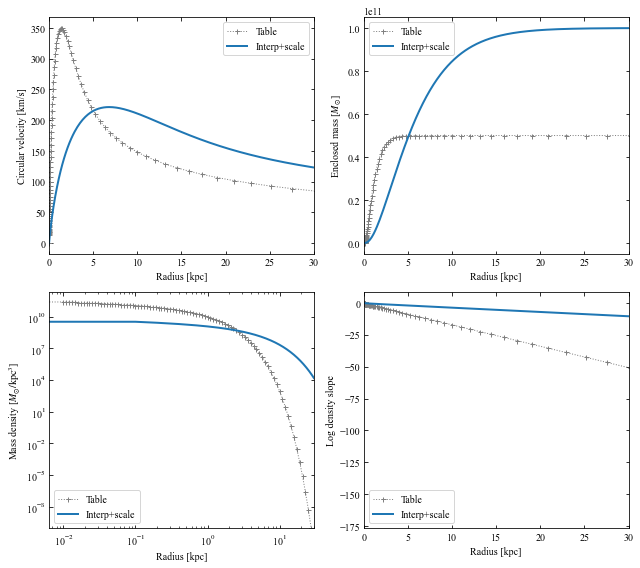

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Make pseudo table bundle, for plotting
table_gather = {'r': r, 'vcirc': vcirc, 'menc3D_sph': menc, 'rho': rho, 
                'dlnrho_dlnr': dlnrho_dlnr, 'n': n, 'invq': invq, 'q': 1./invq, 
                'total_mass': total_mass, 'Reff': Reff }

plot_kwargs = [{'color':'grey', 'ls':':', 'marker':'+', 'ms':5, 'label':'Table'},
               {'lw': 2., 'label':'Interp+scale'}]

spm.plot.plot_profiles([table, table_gather], 
                       prof_names=['v_circ', 'enclosed_mass', 'density', 'dlnrho_dlnr'],
                       rlim=[r.min(), r.max()], 
                       rlog = [False, False, True, False], 
                       plot_kwargs=plot_kwargs)

### Interpolating without loaded tables

The ``sersic_profile_mass_VC`` interpolation functions can also be used directly, without separately loading the pre-computed tables. 

The following example shows the syntax for this case.

In [4]:
total_mass = 1.e11
Reff = 5.0
n = 1.0
r = np.arange(0., 30.1, 0.1)
invq_arr = [1., 2.5, 3.33, 5., 10.]

vcs, mencs, rhos, dlnrho_dlnrs = [], [], [], []

for invq in invq_arr:
    vc = spm.interpolate_sersic_profile_VC(r=r, total_mass=total_mass, Reff=Reff,
                                           n=n, invq=invq, path=table_dir)
    menc = spm.interpolate_sersic_profile_menc(r=r, total_mass=total_mass, Reff=Reff,
                                               n=n, invq=invq, path=table_dir)
    rho = spm.interpolate_sersic_profile_rho(r=r, total_mass=total_mass, Reff=Reff,
                                             n=n, invq=invq, path=table_dir)
    dlnrho_dlnr = spm.interpolate_sersic_profile_dlnrho_dlnr(r=r, Reff=Reff, n=n, 
                                                 invq=invq, path=table_dir)
    vcs.append(vc)
    mencs.append(menc)
    rhos.append(rho)
    dlnrho_dlnrs.append(dlnrho_dlnr)

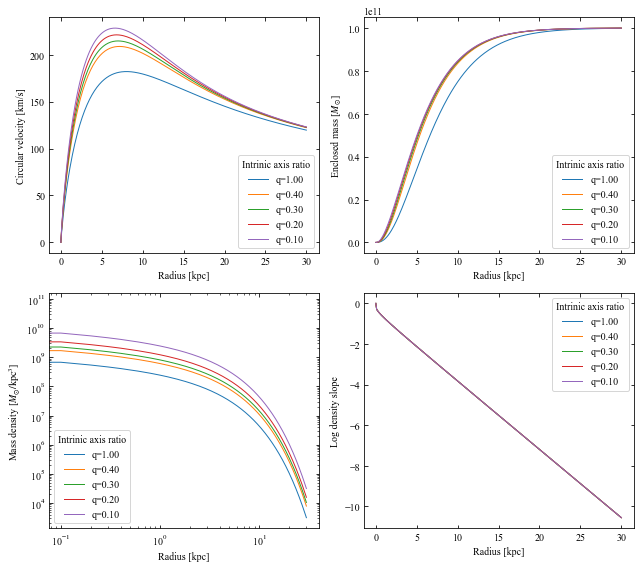

In [5]:
# Make pseudo table bundles, for plotting
tables = []
plot_kwargs = []
for invq, vc, menc, rho, dlnrho_dlnr in zip(invq_arr, vcs, mencs, rhos, dlnrho_dlnrs):
    table_gather = {'r': r, 'vcirc': vc, 'menc3D_sph': menc, 'rho': rho, 
                    'dlnrho_dlnr': dlnrho_dlnr, 'n': n, 'invq': invq, 'q': 1./invq, 
                    'total_mass': total_mass, 'Reff': Reff }
    tables.append(table_gather)
    plot_kwargs.append({'label': 'q={:0.2f}'.format(1./invq)})

fig_kwargs = {'legend_title': 'Intrinic axis ratio'}

    
spm.plot.plot_profiles(tables, 
                       prof_names=['v_circ', 'enclosed_mass', 'density', 'dlnrho_dlnr'],
                       rlog = [False, False, True, False], 
                       plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)

#### "Nearest" interpolation

Finally, the "nearest" versions of the interpolation functions 
can also be used to find the closest value of $n$ and $invq$ 
that have been pre-computed, and use those tables for interpolation. 

In [6]:
total_mass = 1.e11
Reff = 5.0
n = 0.975
invq_arr = 4.75
r = np.arange(0., 30.1, 0.1)

vc = spm.interpolate_sersic_profile_VC_nearest(r=r, total_mass=total_mass, Reff=Reff,
                                       n=n, invq=invq, path=table_dir)
menc = spm.interpolate_sersic_profile_menc_nearest(r=r, total_mass=total_mass, Reff=Reff,
                                           n=n, invq=invq, path=table_dir)
rho = spm.interpolate_sersic_profile_rho_nearest(r=r, total_mass=total_mass, Reff=Reff,
                                         n=n, invq=invq, path=table_dir)
dlnrho_dlnr = spm.interpolate_sersic_profile_dlnrho_dlnr_nearest(r=r, Reff=Reff, n=n, 
                                             invq=invq, path=table_dir)

### Interpolate all table profiles

There are cases where it is convenient to interpolate the entire set of profiles for a table. The function `interpolate_entire_table` enables this calculation.

In [7]:
total_mass = 1.e11
Reff = 5.0
n = 1.0
invq_arr = 5.0
r = np.arange(0., 30.1, 0.1)

table_interp = spm.interpolate_entire_table(r=r, total_mass=total_mass, Reff=Reff, 
                                            n=n, invq=invq,path=table_dir)

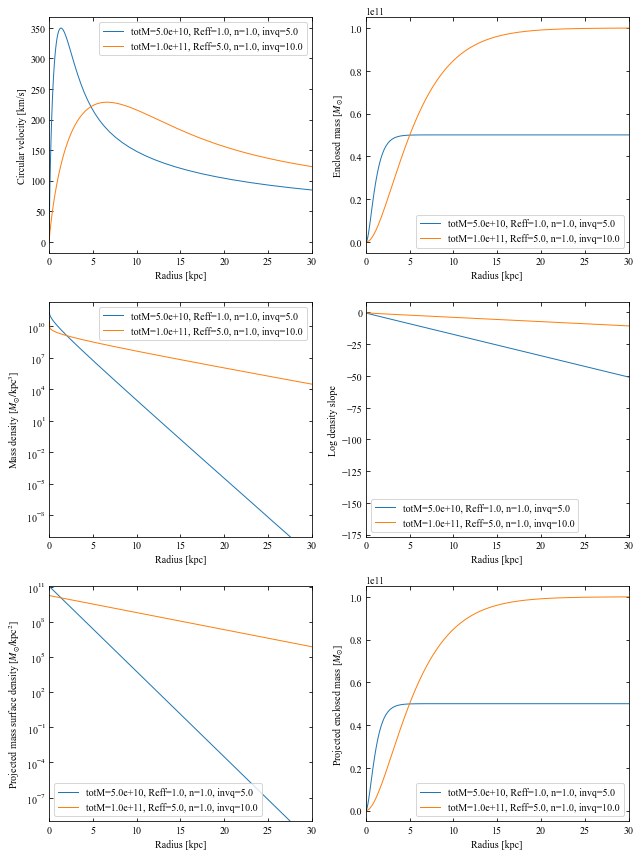

In [8]:
spm.plot.plot_profiles([table, table_interp], 
                       ylog=[False, False, True, False, True, False],
                       rlog=False, rlim=[0.,30.])

Alternatively, the pre-loaded table can be used directly.

In [9]:
table = spm.io.read_profile_table(n=n, invq=invq, path=table_dir)
table_interp2 = spm.interpolate_entire_table(r=r, table=table, 
                                             total_mass=total_mass, Reff=Reff)